In [1]:
__author__ = 'Abyoso Hapsoro Nurhadi'

# Pengantar
Notebook berikut sudah dites pada interpreter lokal dan online (menggunakan [colab.research.google.com](https://colab.research.google.com)) yang tersedia pada link berikut: <br>
https://colab.research.google.com/drive/1ovmAEtNX58zjZo3CbwBj2x6bgU8drhKU

# Definisi

$G = \{V_T, V_N, Q, S\}$ adalah sebuah tata bahasa Context-Free Lindenmayer dengan:

$
\begin{align}
    V_T &= \{d, +, -\} \\
    V_N &= \{S, D\} \\
    Q &= \left\{ \begin{array}{lll}
        1. S \to D+D+D+D \\
        2. D \to D+D-D-DD+D+D-D|d \\
        3. + \to + \\
        4. - \to -
    \end{array} \right\}
\end{align}
$

# Masalah
Akan dibuat program untuk generate Fraktal Lindenmayer lalu menggambarkannya.

# Jawaban

In [2]:
!pip install -U tqdm
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pkg_resources

print('tqdm\t\t:', pkg_resources.get_distribution('tqdm').version)
print('matplotlib\t:', pkg_resources.get_distribution('matplotlib').version)

tqdm		: 4.65.0
matplotlib	: 3.7.1


In [4]:
import os
from math import pi, sin, cos
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('bmh')

def _generate_transform(sequence, transformations, iterations, show_progress):
    iterator = range(iterations)
    if show_progress:
        iterator = tqdm(iterator, desc = 'transformation ', bar_format = '{l_bar}{bar:25}{r_bar}{bar:-10b}')

    for _ in iterator:
        sequence = ''.join(transformations.get(el, el) for el in sequence)
    return sequence

def _branching(sequence, readjust_factor, print_sequence, show_progress):
    saved_states = []
    state = (0, 0, 90)
    yield (0, 0)

    iterator = sequence
    if show_progress:
        iterator = tqdm(iterator, desc = 'branching      ', bar_format = '{l_bar}{bar:25}{r_bar}{bar:-10b}')

    for command in iterator:
        x, y, angle = state

        if command.lower() == 'd':
            state = (x - cos(angle * (pi/180)),
                     y + sin(angle * (pi/180)),
                     angle)

            if command.islower():
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':
            state = (x, y, angle + readjust_factor)

        elif command == '-':
            state = (x, y, angle - readjust_factor)

    if print_sequence:
        print(sequence)

class LSystem():
    def __init__(self, axiom, rules):
        assert type(axiom) == str, 'axiom must be a string'
        assert type(rules) == dict, 'rules must be a dictionary'

        self.axiom          = axiom
        self.rules          = rules
        self.depth          = 0
        self.axiom_backup   = axiom
        self.rules_backup   = rules

    def execute(self, iterations, angle = 90, print_sequence = False, system = 'Fractal',
                figsize = (9, 9), plot_color = 'blue', bare_plot = True, mark_origin = False,
                marker_color = 'red', showfig = True, savefig = False, show_progress = False):
        assert type(iterations) in [int, float], 'iterations must be a number'
        assert iterations  >= 0, 'iterations must be a non-negative number'
        assert iterations  == int(iterations), 'iterations must be an integer'

        self.axiom          = _generate_transform(self.axiom, self.rules, iterations, show_progress)
        self.depth         += iterations
        coordinates         = _branching(self.axiom, angle, print_sequence, show_progress)
        self._plot(coordinates, system, figsize, plot_color, bare_plot, mark_origin, marker_color, showfig, savefig)

    def reset(self, axiom = None, rules = None):
        if axiom == None:
            axiom = self.axiom_backup
        if rules == None:
            rules = self.rules_backup
        self.__init__(axiom, rules)

    def _plot(self, coordinates, system, figsize, plot_color, bare_plot, mark_origin, marker_color, showfig, savefig):
        X, Y = zip(*coordinates)

        fig, ax = plt.subplots(1, 1, figsize = figsize)

        if bare_plot:
            ax.axis('off')

        ax.set_aspect(aspect = 'equal', adjustable = 'datalim')
        ax.plot(X, Y, linestyle = '-', color = plot_color)

        if mark_origin:
            ax.plot([0], [0], marker = 'o', color = marker_color)

        plt.title('Lindenmayer System with depth {}'.format(self.depth).replace('System', system))

        if showfig:
            fig = plt.gcf()
            plt.show()

        if savefig:
            plt.draw()
            filename = input('input filename w/ extension: ')
            if showfig:
                fig.savefig(filename, dpi = 100, bbox_inches = 'tight')
            else:
                plt.savefig(filename, dpi = 100, bbox_inches = 'tight')
            print('saved at', os.getcwd().replace('\\', '/') + '/' + filename)

        plt.close()

branching      : 100%|█████████████████████████| 475/475 [00:00<00:00, 414715.74it/s]


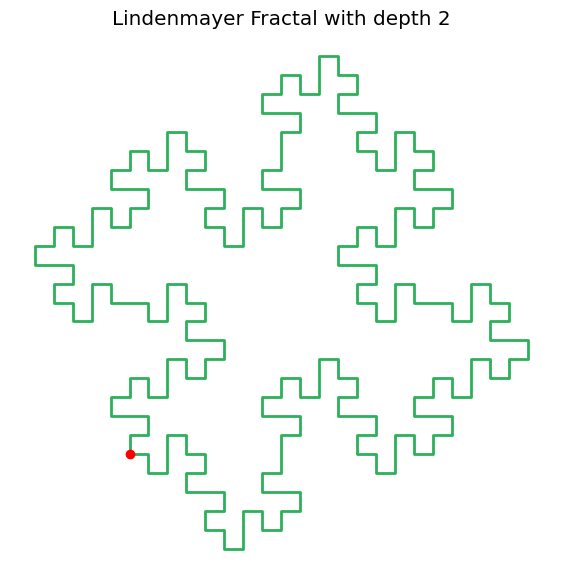

In [5]:
axiom       = 'D+D+D+D'
rules       = {'D': 'D+D-D-DD+D+D-D'}
Lindenmayer = LSystem(axiom, rules)
Lindenmayer.execute(2, show_progress = True, figsize = (7, 7), plot_color = (44/255, 176/255, 55/155), mark_origin = True)